In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data=pd.read_csv('telecom_train.csv')

In [4]:
def get_data_info(df):
    res = pd.DataFrame(
        {'dtype': df.dtypes,
         'Num nulls': df.isnull().sum(),
         'Num not nulls': (~df.isnull()).sum(),
         'n unique': df.nunique(),
         'n largest': df.apply(lambda x: x.value_counts().nlargest(3).to_dict()),
         'max(for numerical)': df.apply(lambda x: x.max() if x.dtype != 'object' else None),
         'min(for numerical)': df.apply(lambda x: x.min() if x.dtype != 'object' else None)
        })
    return res

In [5]:
get_data_info(data)

,dtype,Num nulls,Num not nulls,n unique,n largest,max(for numerical),min(for numerical)
Customer ID,object,0,5500,5500,"{'0002-ORFBO': 1, '5174-ITUMV': 1, '5178-LMXOP...",NaN,NaN
Gender,object,0,5500,2,"{'Male': 2792, 'Female': 2708}",NaN,NaN
Age,int64,0,5500,62,"{42: 123, 47: 119, 35: 117}",80.000000,19.000000
Married,object,0,5500,2,"{'No': 2810, 'Yes': 2690}",NaN,NaN
Number of Dependents,int64,0,5500,10,"{0: 4217, 1: 444, 2: 417}",9.000000,0.000000
City,object,0,5500,1102,"{'San Diego': 221, 'Los Angeles': 219, 'San Jo...",NaN,NaN
Zip Code,int64,0,5500,1622,"{92027: 35, 92122: 31, 92028: 30}",96148.000000,90001.000000
Latitude,float64,0,5500,1622,"{33.141265: 35, 32.85723: 31, 33.362575: 30}",41.962127,32.555828
Longitude,float64,0,5500,1621,"{-116.967221: 35, -117.209774: 31, -117.299644...",-114.192901,-124.301372
Number of Referrals,int64,0,5500,12,"{0: 2955, 1: 870, 3: 212}",11.000000,0.000000


## Data Preprocessing

- Remove the columns **"Churn Category"** and **"Churn Reason"** because they are filled in after the customer has leaves and cannot be used for prediction
- Remove the columns **"City"** and **"Zip Code"** because there is too little data to assume that the client is leaving a specific city
- Remove examples when a client joins, as well as the **"Customer ID"** column

In [6]:
data = data.drop(['Churn Category', 'Churn Reason', "City", "Zip Code", "Customer ID"], axis=1)
data = data[data["Customer Status"] != 'Joined']
data.reset_index(drop=True, inplace=True)

In [7]:
data.head(5)

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,34.827662,-118.999073,2,9,NaN,Yes,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,34.162515,-118.203869,0,9,NaN,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,33.645672,-117.922613,0,4,Offer E,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,38.014457,-122.115432,1,13,Offer D,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,34.227846,-119.079903,3,3,NaN,Yes,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [8]:
new_col_names = data.columns.str.lower().str.replace(' ', '_')
data.columns = new_col_names

In [9]:
target = 'customer_status'
categorical_features = [i for i in data.columns if data[i].dtype == 'object' and i != target]
numeric_features = [i for i in data.columns if i not in categorical_features and i != target]

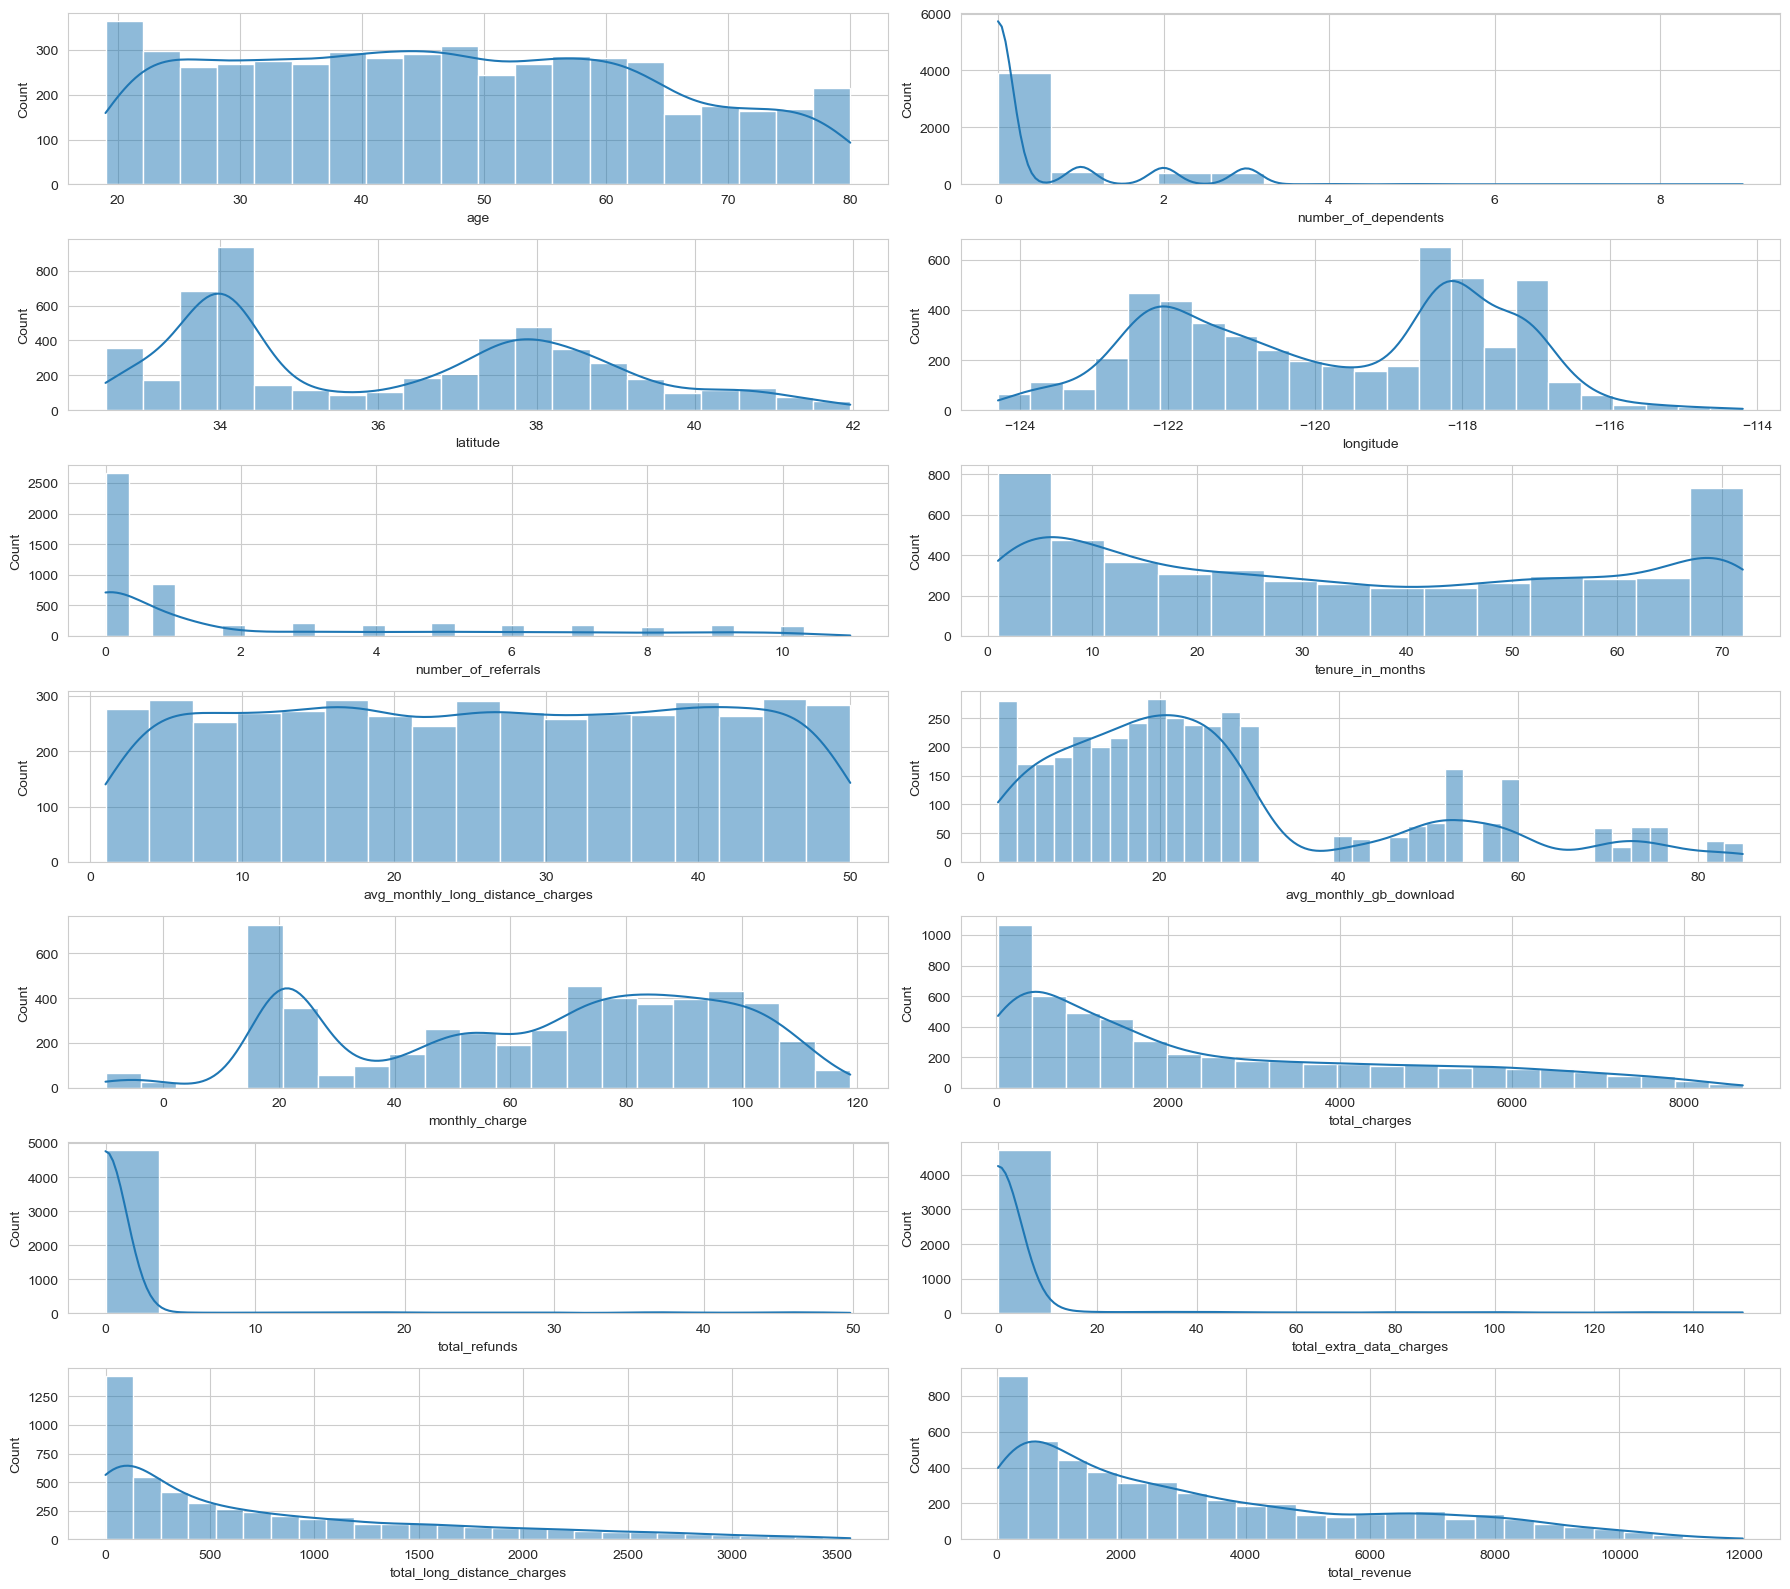

In [10]:
fig, axs = plt.subplots(7, 2, figsize=(18, 16))

for i, feat in enumerate(numeric_features):
    row, col = np.unravel_index(i, axs.shape)
    sns.histplot(data, x = feat, ax=axs[row, col], kde=True)

plt.tight_layout()
plt.show()

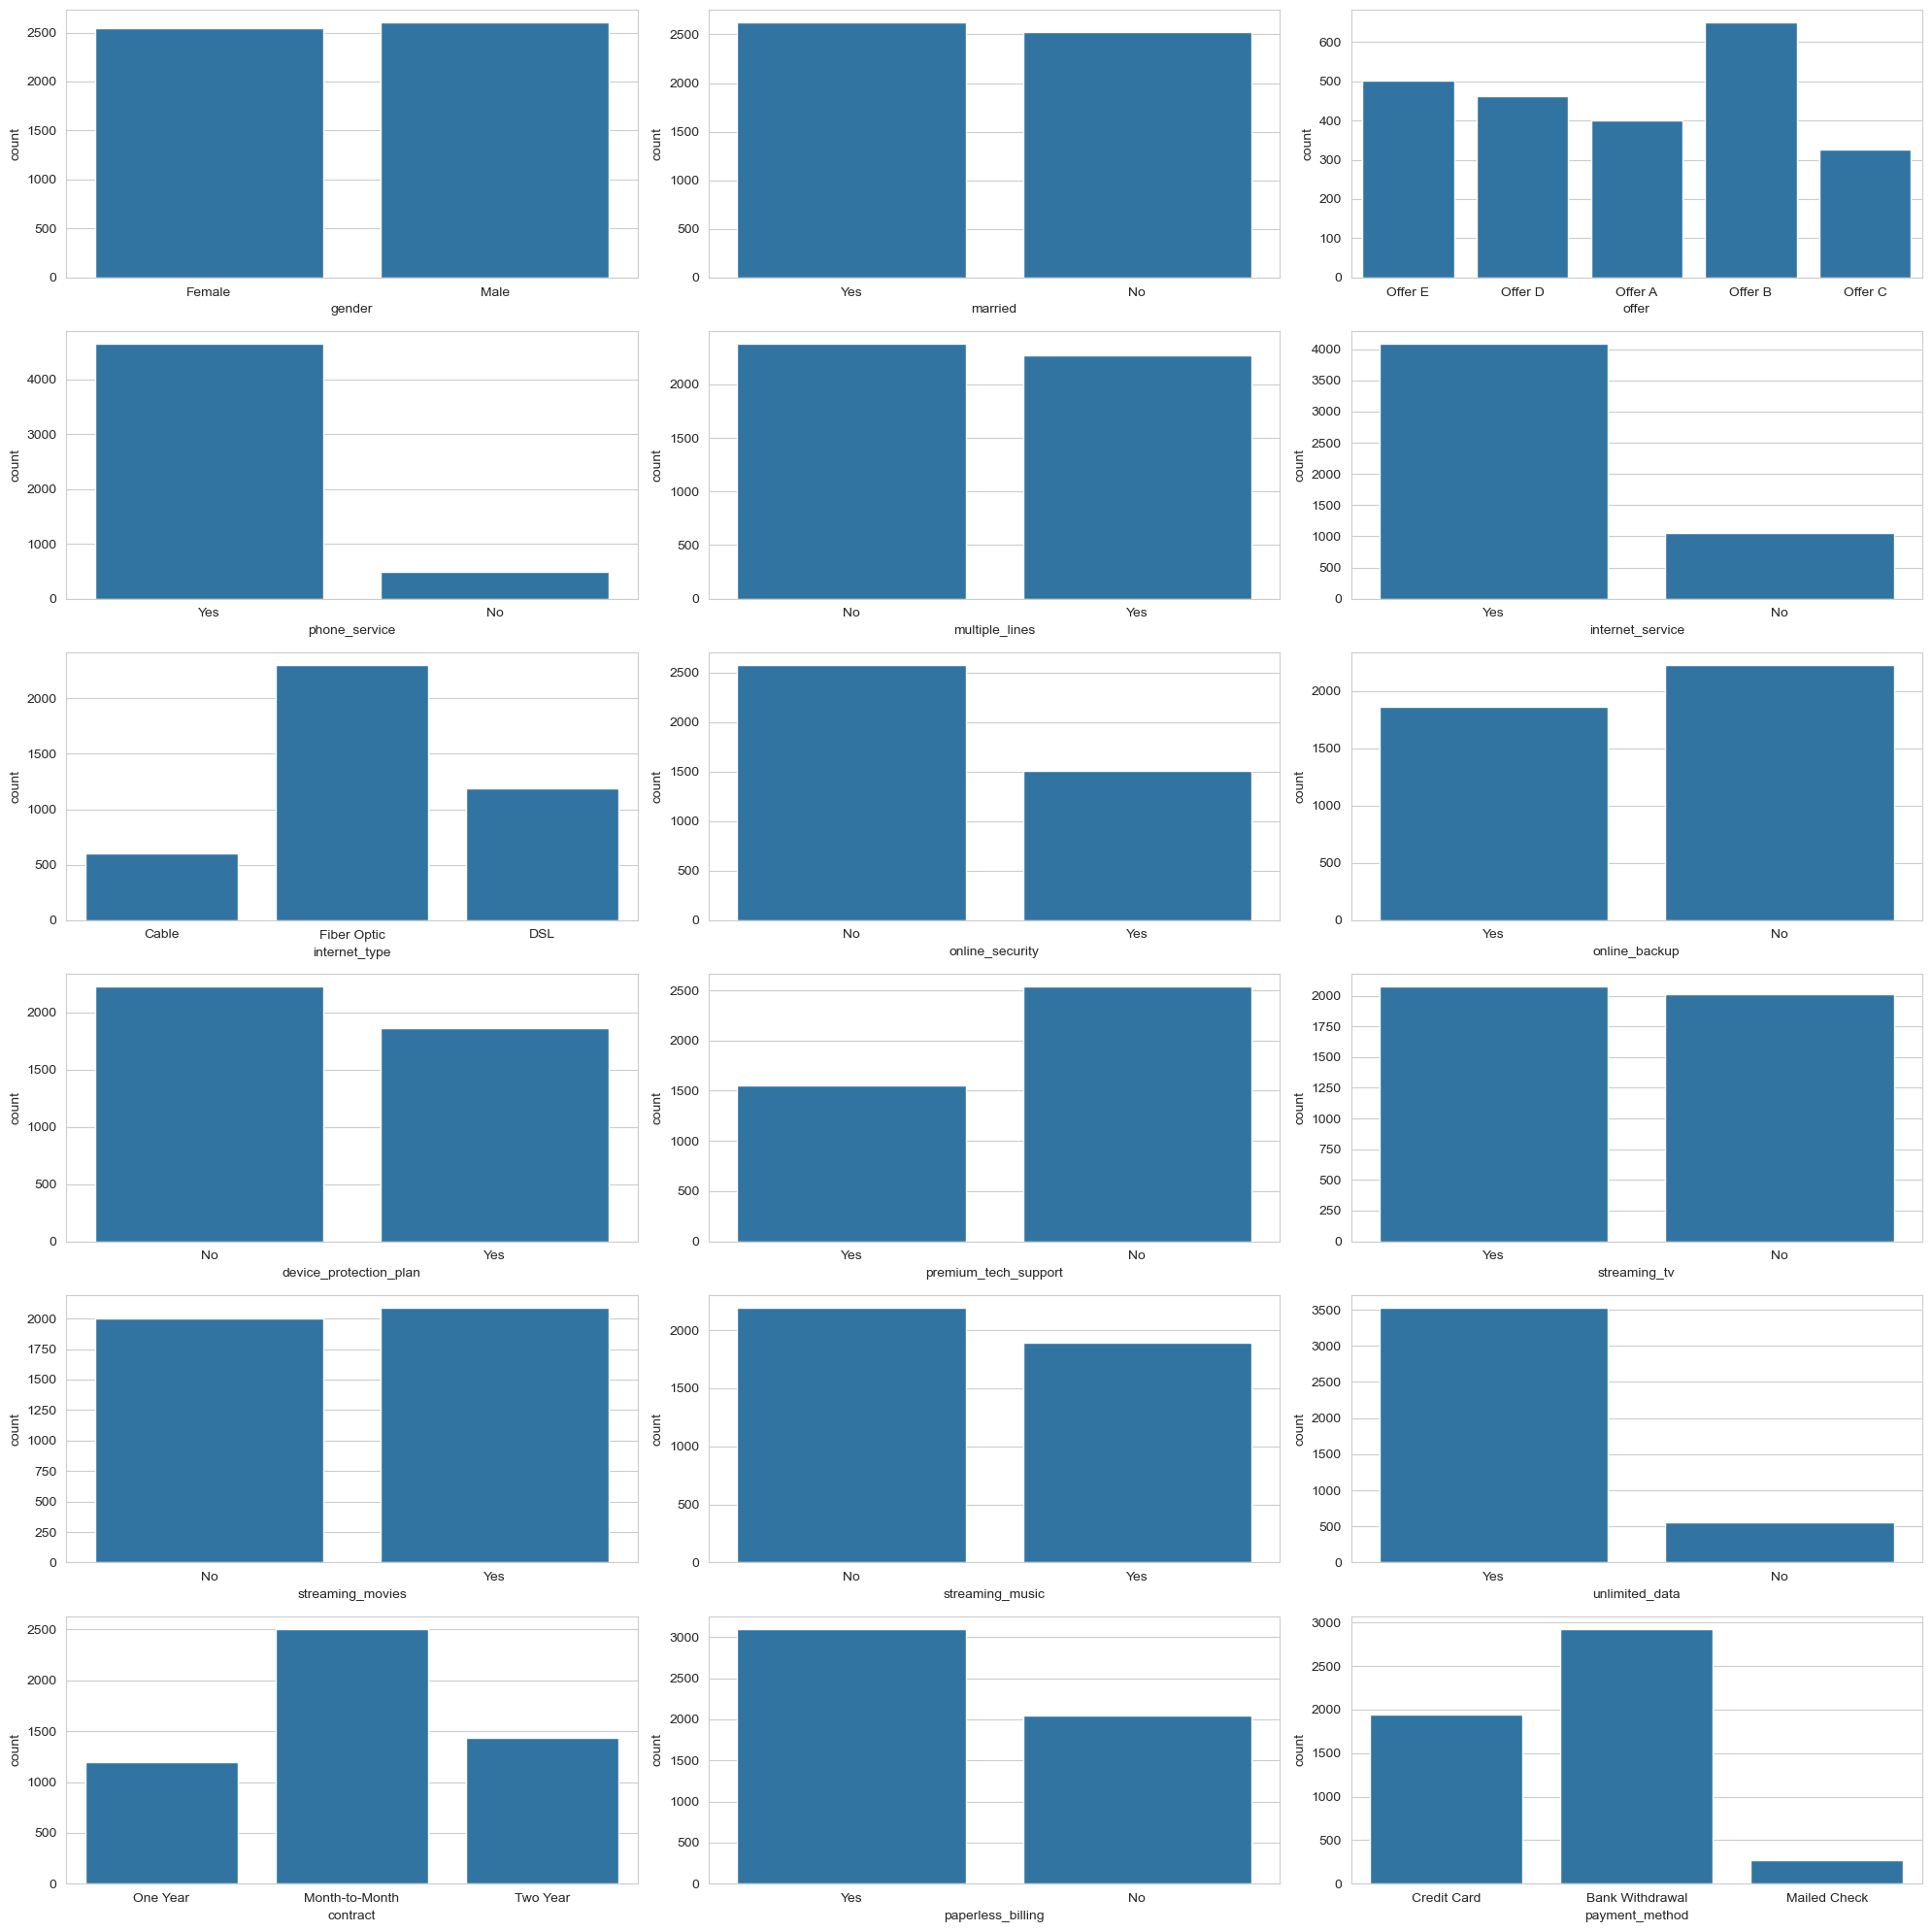

In [11]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20))

for i, feat in enumerate(categorical_features):
    row, col = np.unravel_index(i, axs.shape)
    sns.countplot(data, x = feat, ax=axs[row, col])

plt.tight_layout()
plt.show()

## Filling in the blanks

In [12]:
data.isnull().sum()

gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                2804
phone_service                           0
avg_monthly_long_distance_charges     494
multiple_lines                        494
internet_service                        0
internet_type                        1056
avg_monthly_gb_download              1056
online_security                      1056
online_backup                        1056
device_protection_plan               1056
premium_tech_support                 1056
streaming_tv                         1056
streaming_movies                     1056
streaming_music                      1056
unlimited_data                       1056
contract                          

### Filling **"offer"**

<Axes: xlabel='contract', ylabel='count'>

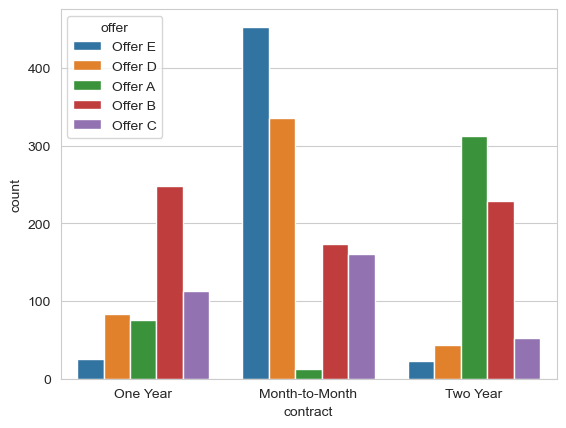

In [13]:
sns.countplot(data, x='contract', hue='offer')

<Axes: xlabel='offer', ylabel='tenure_in_months'>

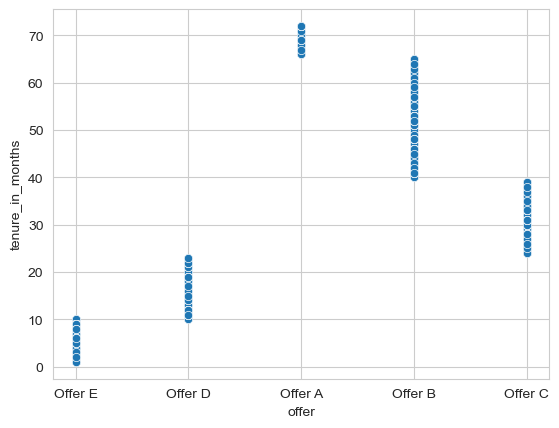

In [14]:
sns.scatterplot(data=data, x='offer', y='tenure_in_months')

<Axes: xlabel='offer', ylabel='count'>

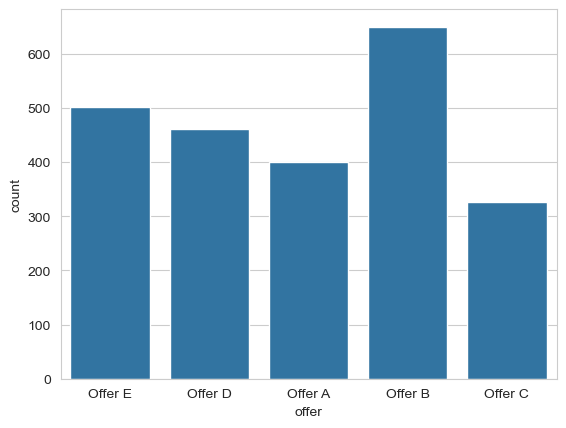

In [15]:
sns.countplot(data, x='offer')

We see that **Offers** depend on the number of months of cooperation with the company **Tenure in Months** and the type of contract **Contract**
In this case, you can fill in the blanks by analyzing the most frequent Offer value among customers with similar characteristics.

In [16]:
data['offer'] = data.groupby(['contract', 'tenure_in_months'])['offer'].\
    transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else data['offer'].mode()[0]))

<Axes: xlabel='offer', ylabel='count'>

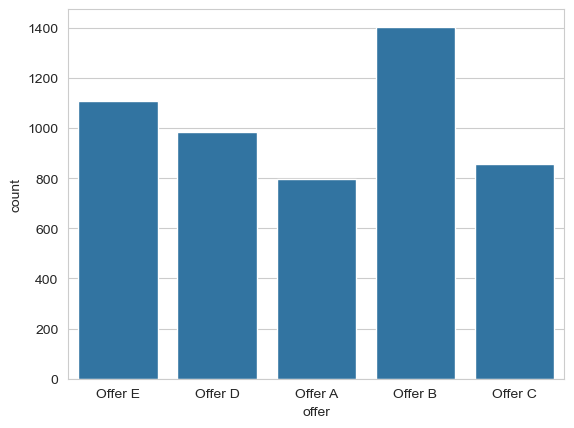

In [17]:
sns.countplot(data, x='offer')

### Filling **avg_monthly_long_distance_charges** and **multiply_lines**

Avg Monthly Long Distance Charges — average monthly customer costs for long-distance communications
Multiple Lines - the client has several telephone lines

Note that the missing values coincide in the same places

In [18]:
(data['avg_monthly_long_distance_charges'].isnull() == data['multiple_lines'].isnull()).all()

True

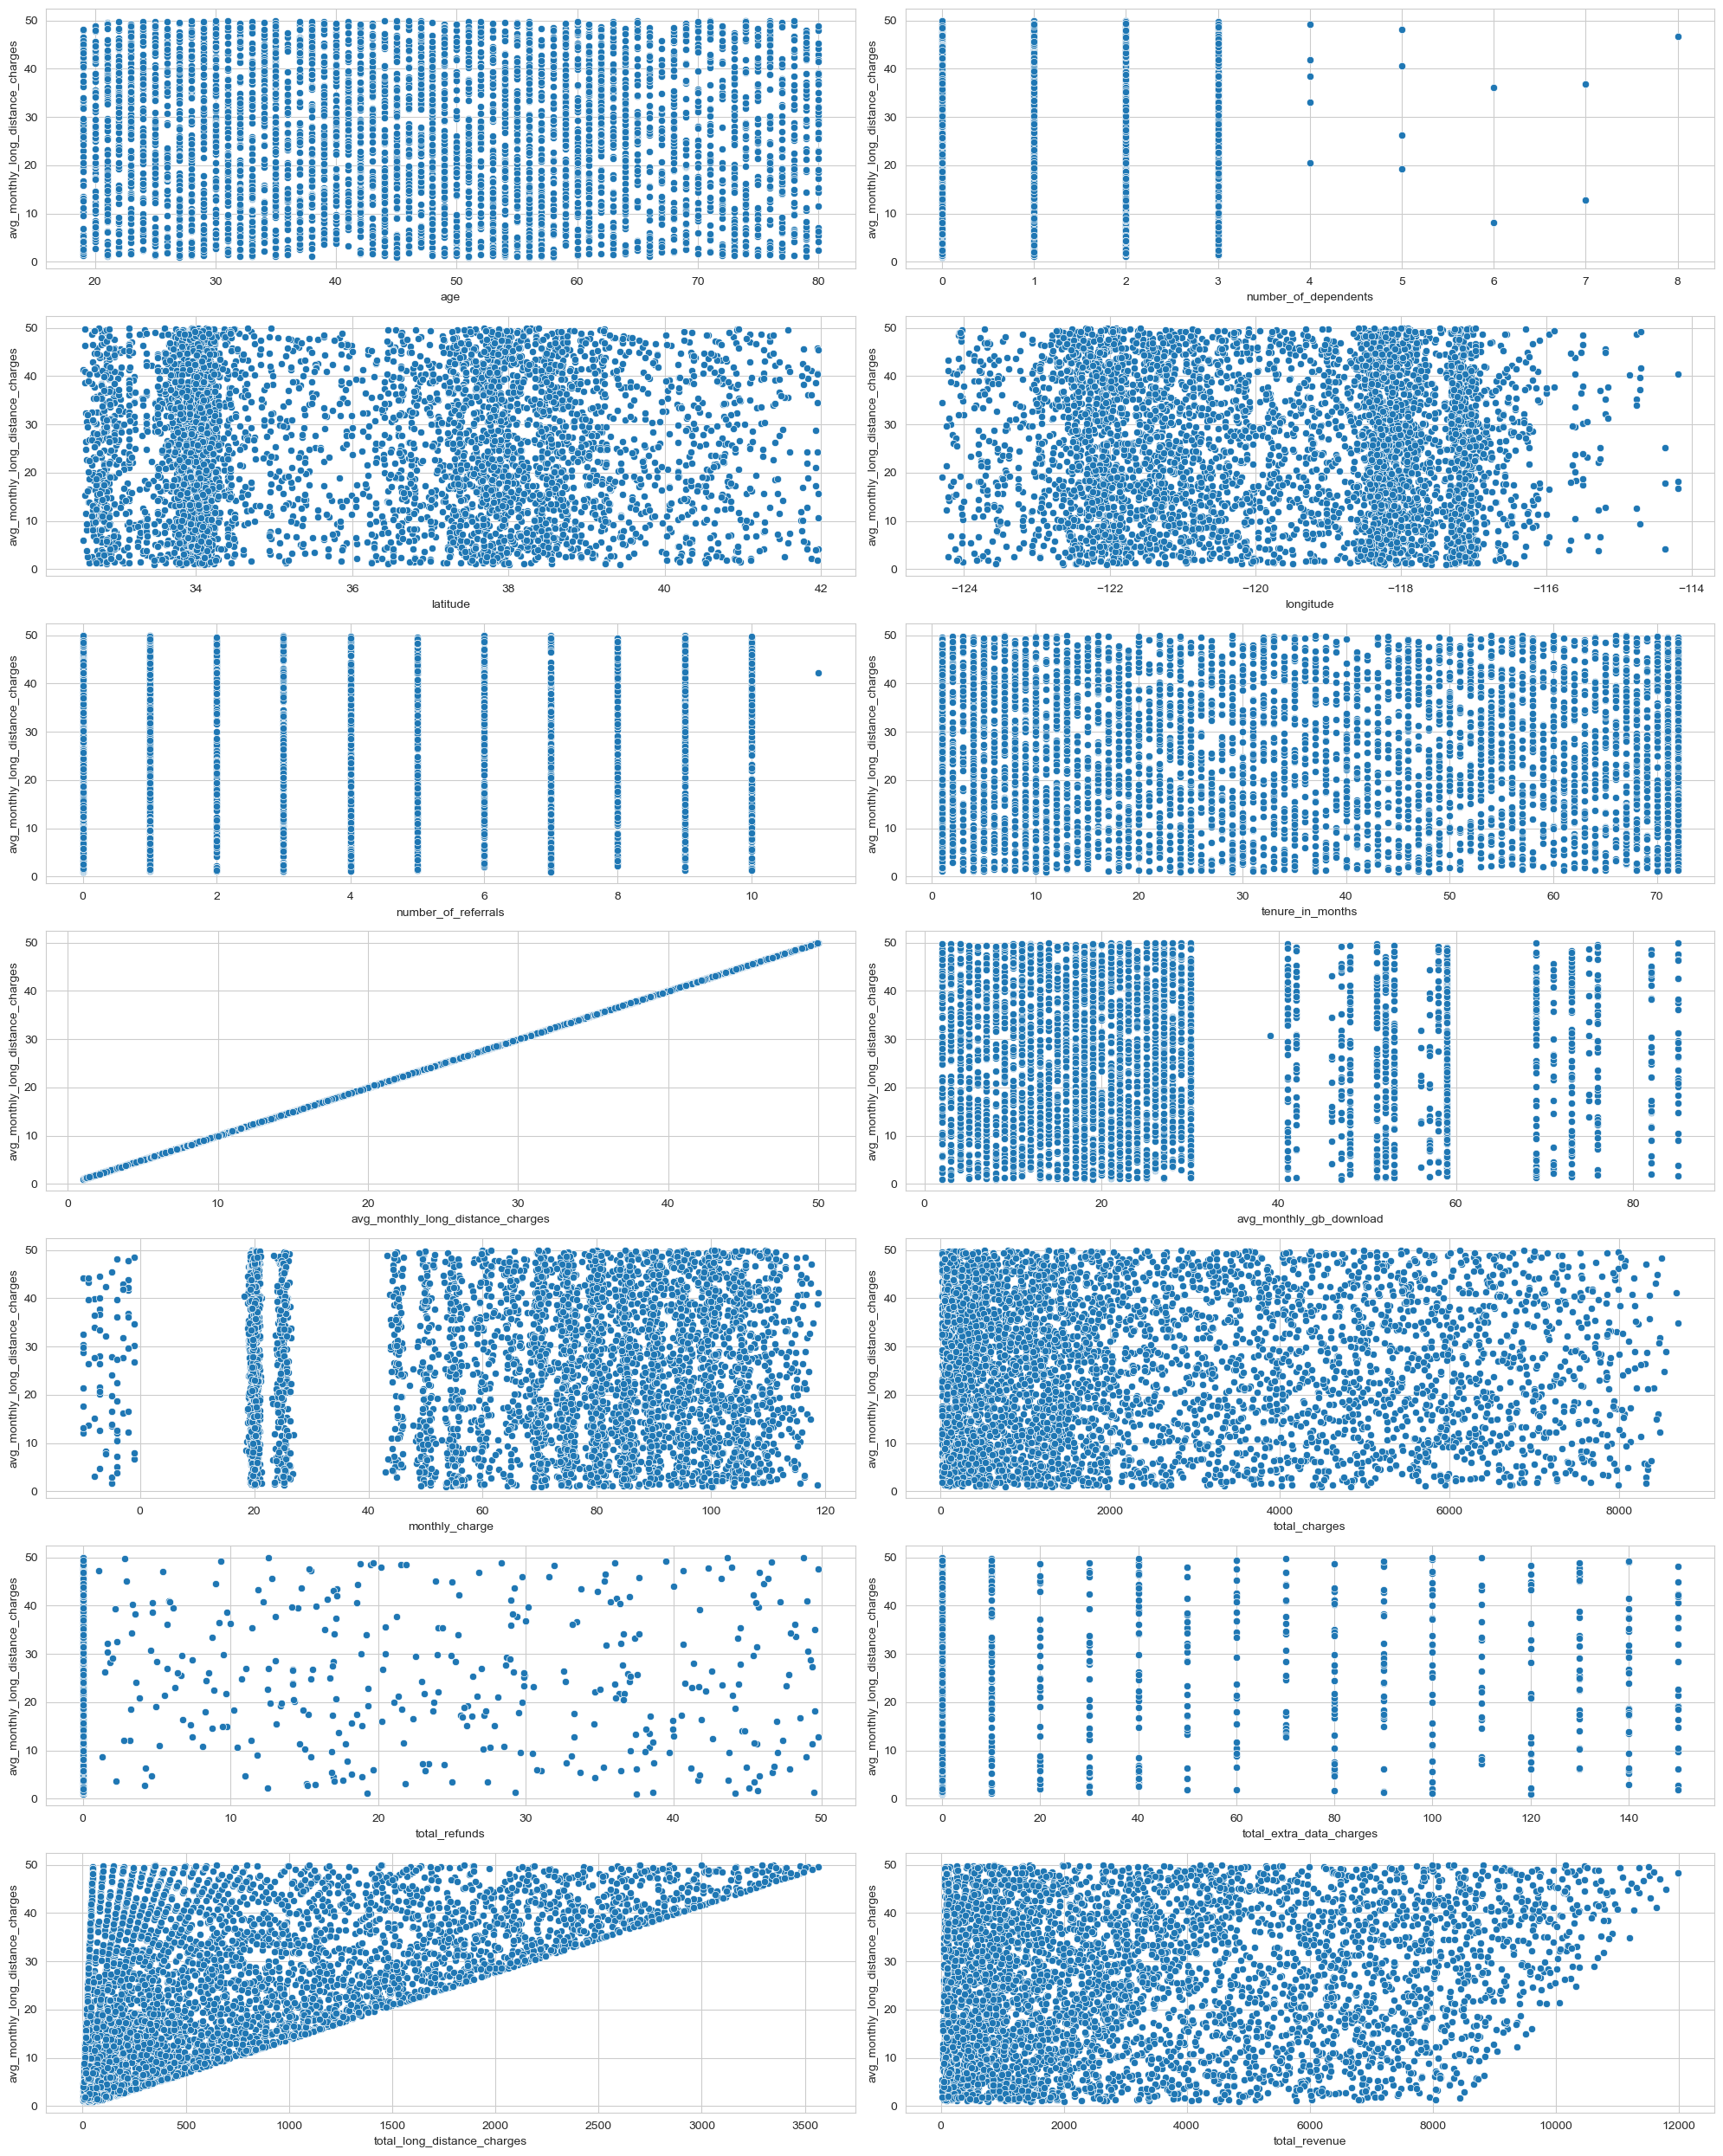

In [19]:
plt.figure(figsize=(20, 25))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(7, 2, i)
    sns.scatterplot(data=data, x=feature, y='avg_monthly_long_distance_charges')

plt.tight_layout()
plt.show()

In [20]:
data['avg_monthly_long_distance_charges'].describe()

count    4651.000000
mean       25.584371
std        14.260013
min         1.010000
25%        13.240000
50%        25.640000
75%        38.080000
max        49.990000
Name: avg_monthly_long_distance_charges, dtype: float64

<Axes: xlabel='avg_monthly_long_distance_charges'>

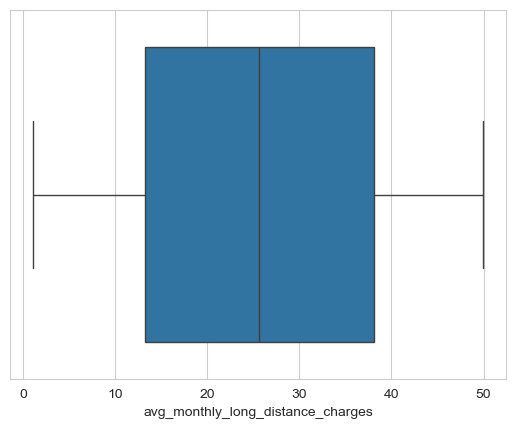

In [21]:
sns.boxplot(data, x='avg_monthly_long_distance_charges')

Due to the fact that there is no obvious dependence **'avg_monthly_long_distance_charges'**  on other features and the absence of outliers, we will fill in the missing values with the mean

In [22]:
data.fillna({'avg_monthly_long_distance_charges': data['avg_monthly_long_distance_charges'].mean()}, inplace=True)

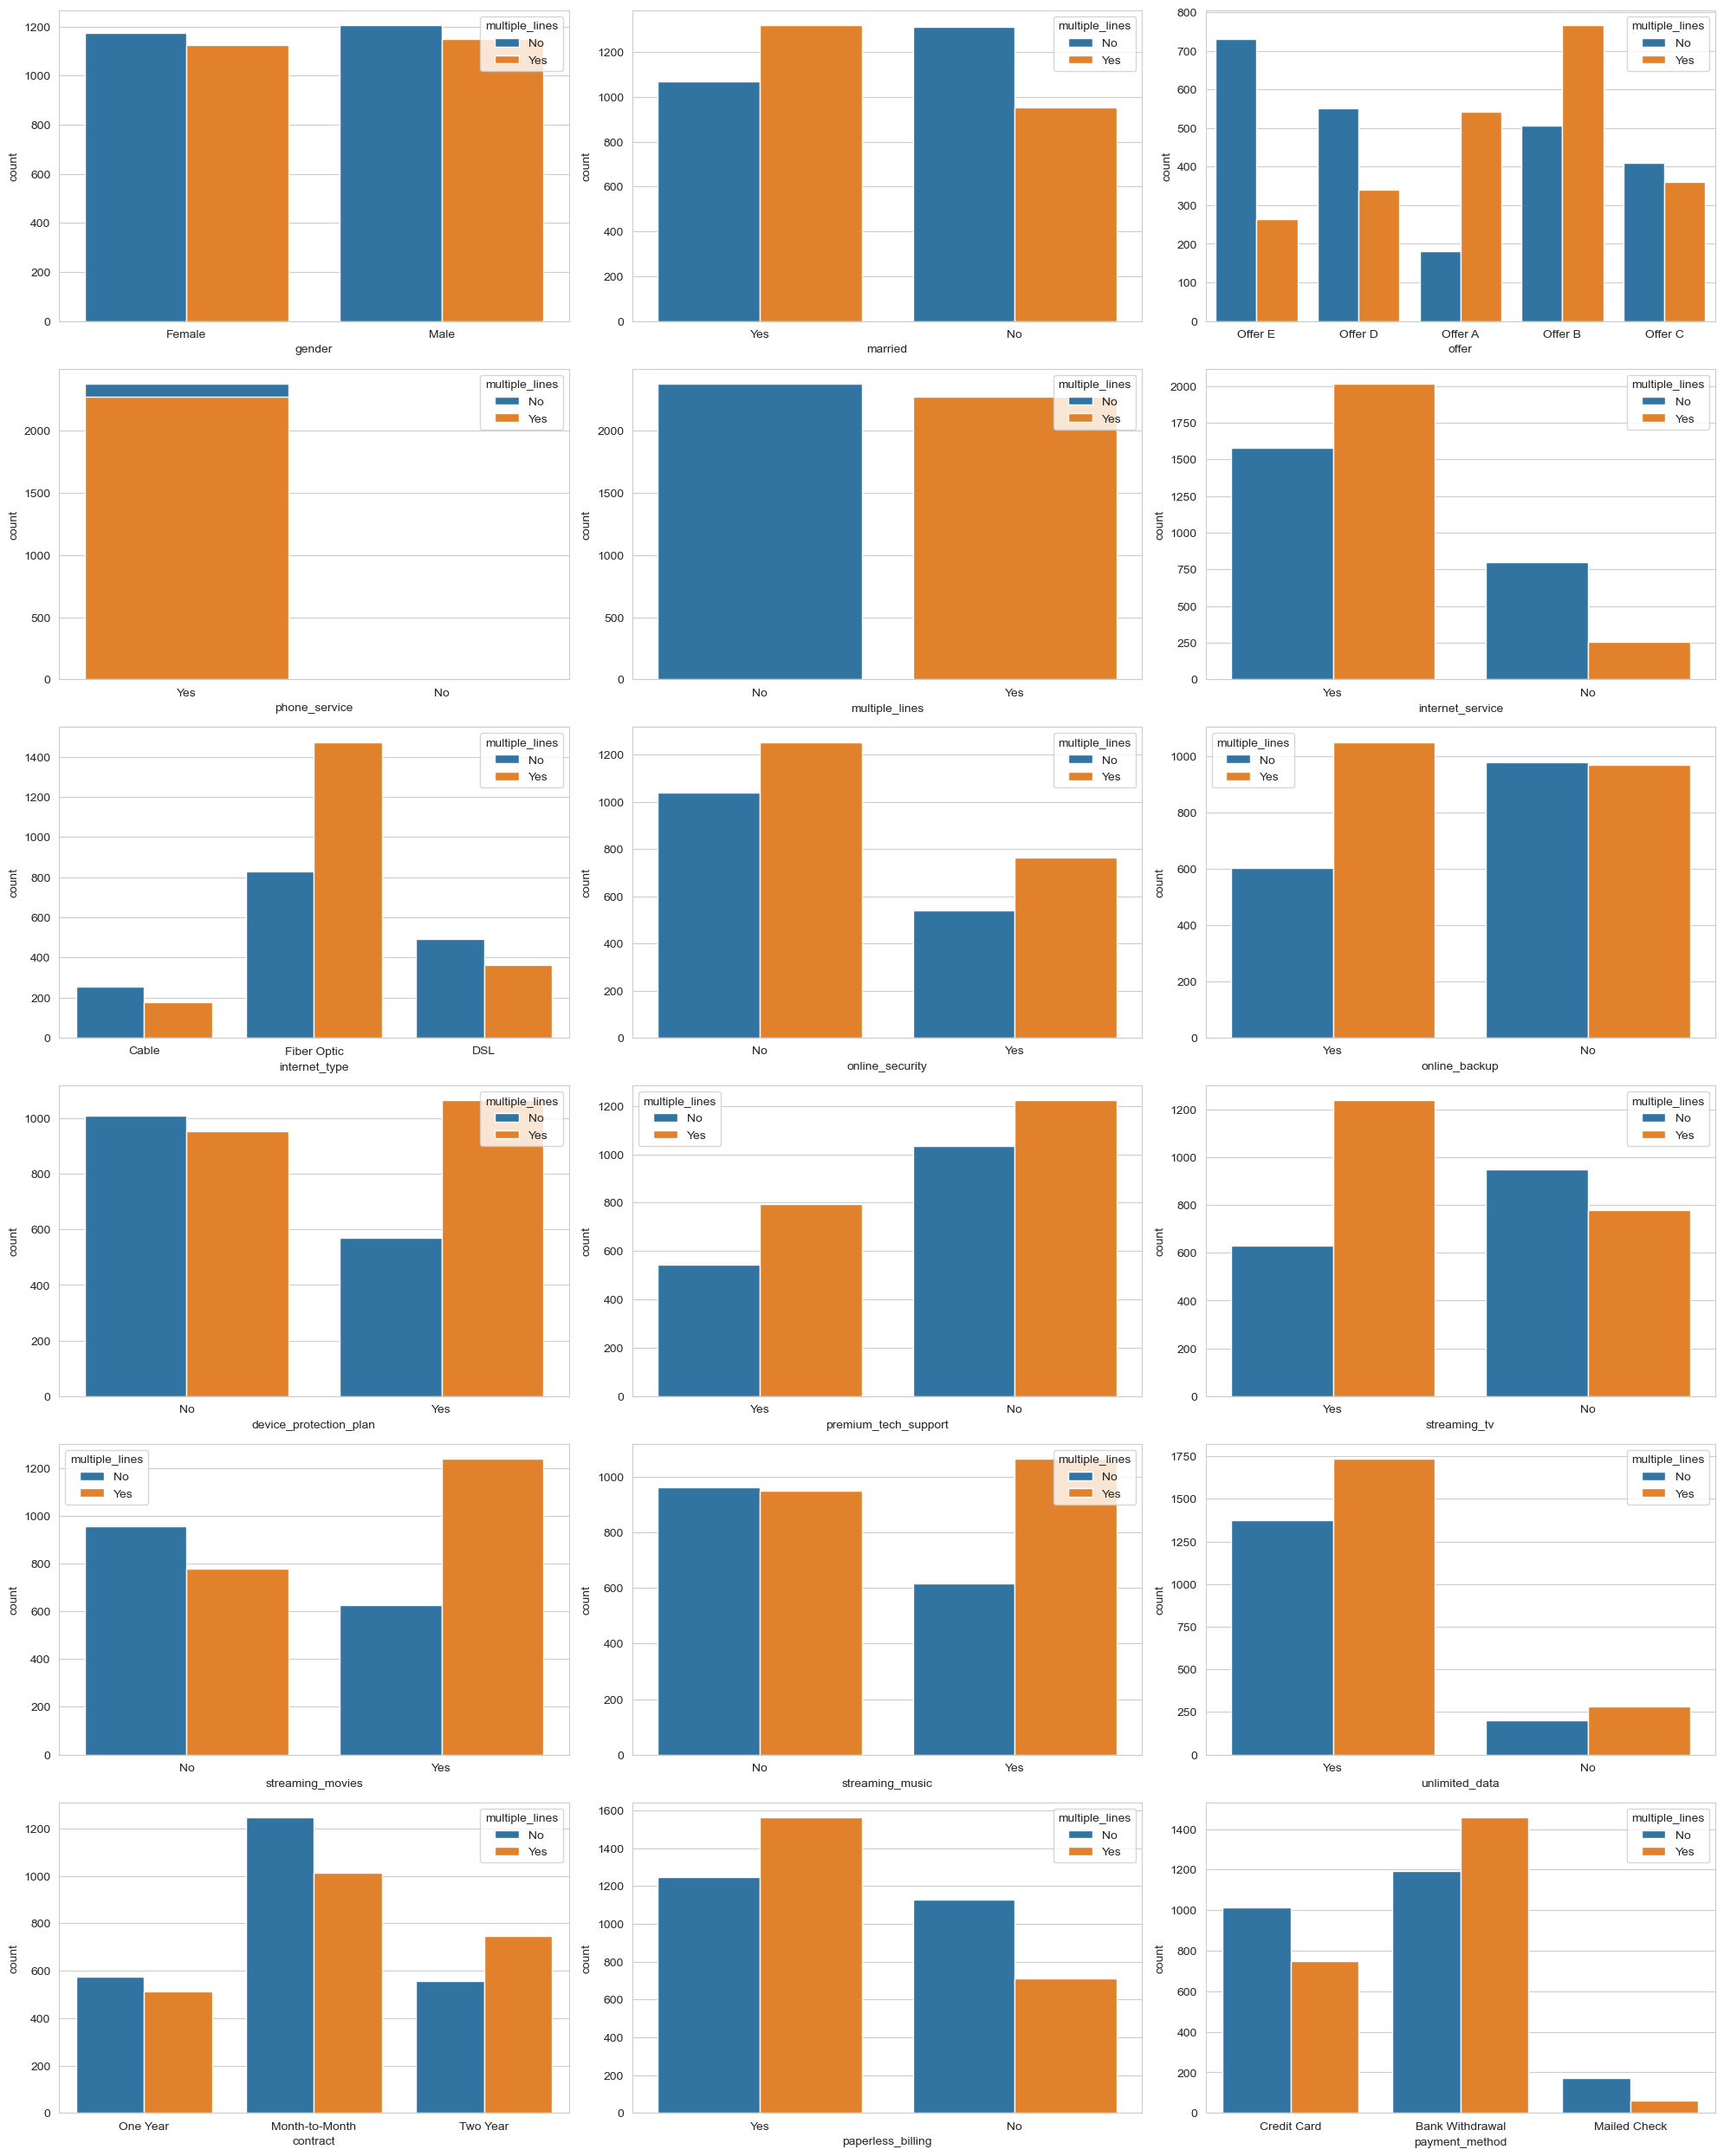

In [23]:
plt.figure(figsize=(20, 25))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=data, x=feature, hue='multiple_lines')

plt.tight_layout()
plt.show()

The presence of multiple lines most likely depends on the offer

In [24]:
data['multiple_lines']=data.groupby(['offer'])['multiple_lines'].\
    transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else data['multiple_lines'].mode()[0]))

### Internet service fillings

There are records in which all the following signs are simultaneously missing.
Only in these records there are gaps in these columns.

In [25]:
columns_to_fill = data.isnull().sum()
columns_to_fill = columns_to_fill[columns_to_fill > 0].index
print('Columns:', columns_to_fill.values)
print('Number of missing values:', data[columns_to_fill].isnull().sum(axis=1).unique())

Columns: ['internet_type' 'avg_monthly_gb_download' 'online_security'
 'online_backup' 'device_protection_plan' 'premium_tech_support'
 'streaming_tv' 'streaming_movies' 'streaming_music' 'unlimited_data']
Number of missing values: [ 0 10]


In [26]:
data[columns_to_fill].isnull().sum()

internet_type              1056
avg_monthly_gb_download    1056
online_security            1056
online_backup              1056
device_protection_plan     1056
premium_tech_support       1056
streaming_tv               1056
streaming_movies           1056
streaming_music            1056
unlimited_data             1056
dtype: int64

If the client does not have access to the Internet, then these characteristics will naturally not be filled in.

In [27]:
len(data.query('internet_service == "No" ')[columns_to_fill])

1056

In [28]:
data.query('internet_service == "No" ')[columns_to_fill].isnull().all(axis=1).all()

True


The most suitable solution is to fill all categorical features with the values 'No', **avg_monthly_gb_download** with the value 0.
For the **internet_type** attribute, we introduce a new category “No internet”

In [29]:
columns_to_fill = columns_to_fill.drop(['internet_type', 'avg_monthly_gb_download'])

In [30]:
for column in columns_to_fill:
    data[column].fillna('No', inplace=True)
data['internet_type'].fillna('No Internet', inplace=True)
data['avg_monthly_gb_download'].fillna(0, inplace=True)

## Emission processing

In [31]:
get_data_info(data)

,dtype,Num nulls,Num not nulls,n unique,n largest,max(for numerical),min(for numerical)
gender,object,0,5145,2,"{'Male': 2603, 'Female': 2542}",NaN,NaN
age,int64,0,5145,62,"{47: 112, 56: 110, 42: 110}",80.000000,19.000000
married,object,0,5145,2,"{'Yes': 2623, 'No': 2522}",NaN,NaN
number_of_dependents,int64,0,5145,10,"{0: 3927, 1: 420, 2: 396}",9.000000,0.000000
latitude,float64,0,5145,1616,"{33.141265: 32, 32.85723: 30, 33.362575: 28}",41.962127,32.555828
longitude,float64,0,5145,1615,"{-116.967221: 32, -117.209774: 30, -117.299644...",-114.192901,-124.301372
number_of_referrals,int64,0,5145,12,"{0: 2664, 1: 856, 3: 207}",11.000000,0.000000
tenure_in_months,int64,0,5145,72,"{1: 305, 72: 273, 71: 137}",72.000000,1.000000
offer,object,0,5145,5,"{'Offer B': 1404, 'Offer E': 1106, 'Offer D': ...",NaN,NaN
phone_service,object,0,5145,2,"{'Yes': 4651, 'No': 494}",NaN,NaN


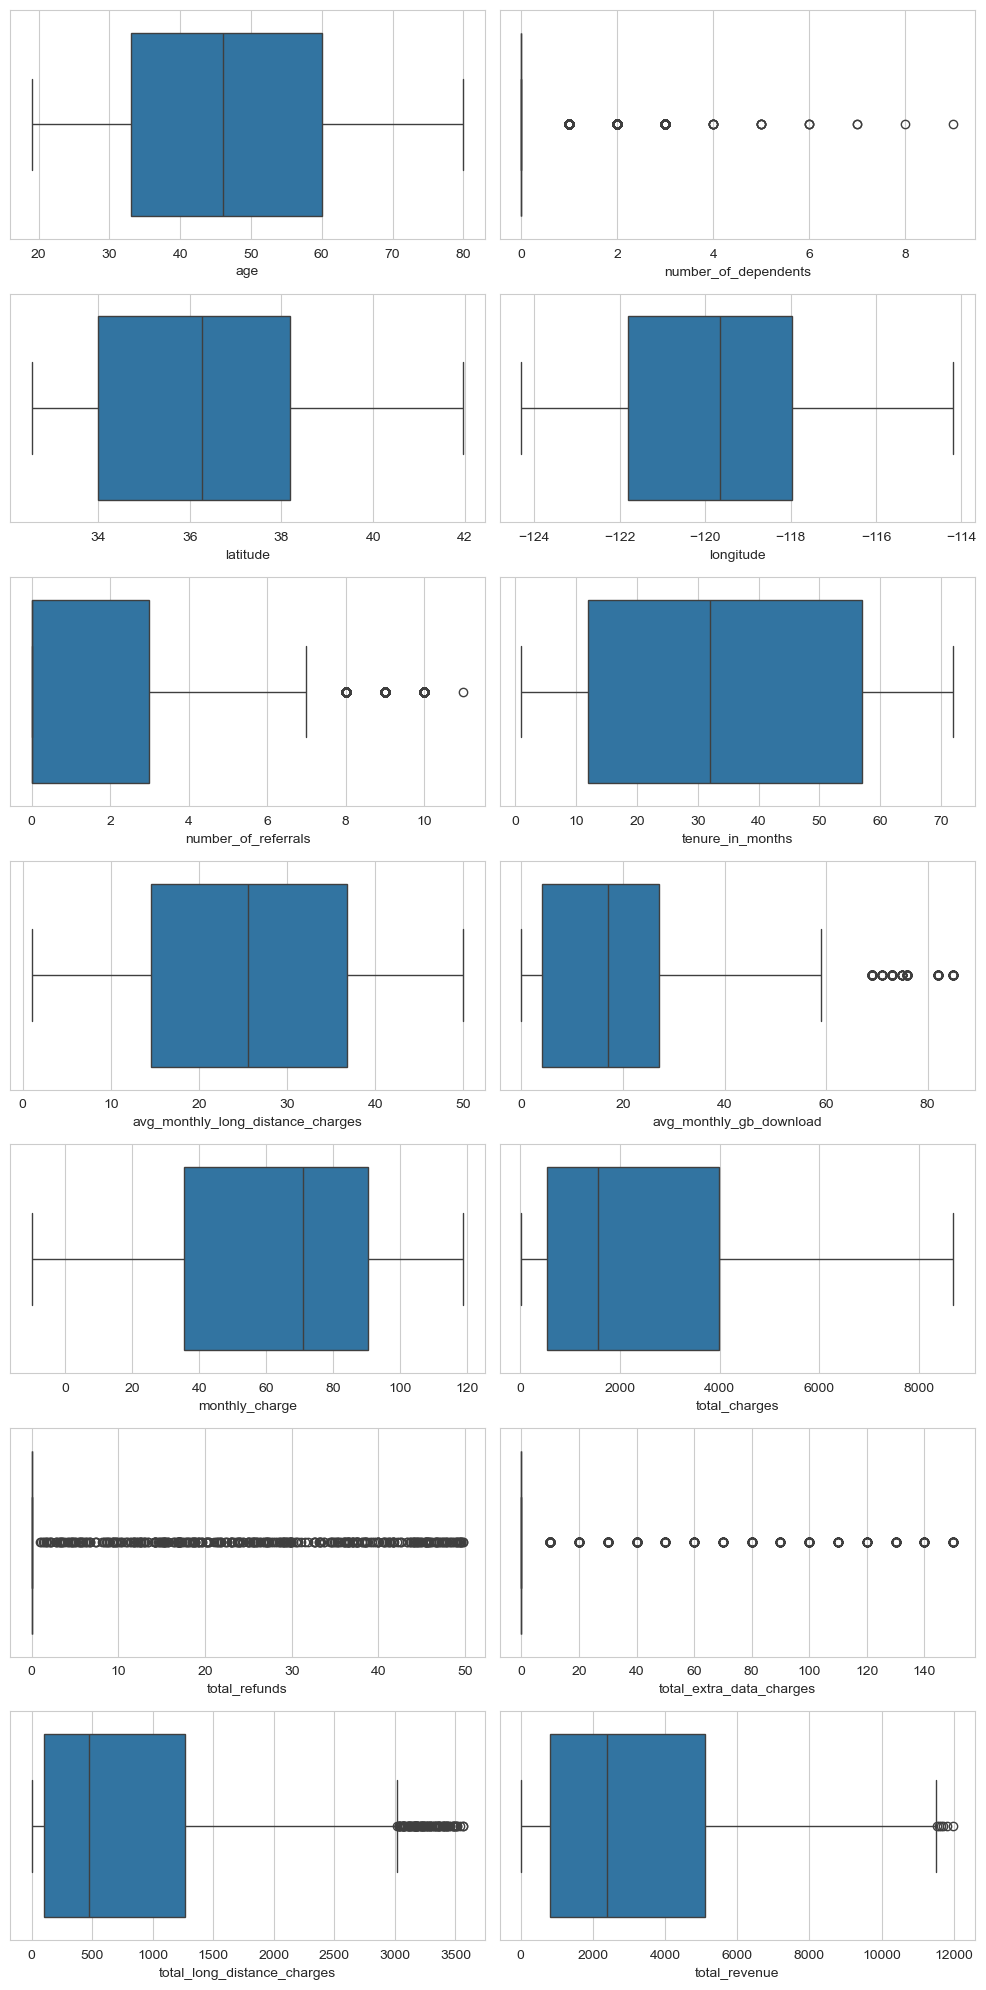

In [32]:
plt.figure(figsize=(10, 20))
for i, feat in enumerate(numeric_features, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(data, x=feat)

plt.tight_layout()
plt.show()

The most suspicious signs for emissions are **'total_long_distance_charges'** and **'total_revenue'**

Note that some features in the future will need to be converted to categorical

In [33]:
def outlier_indices_hyp(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    return outliers.index

In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [35]:
def select_outliers(data, feature):
    iso_forest = IsolationForest(contamination=0.002, random_state=42)
    svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.001)
    scaler = StandardScaler()

    indices_forest = iso_forest.fit_predict(data[[feature]]) == -1
    indices_forest = np.where(indices_forest)[0]

    scaled_total_revenue = scaler.fit_transform(data[[feature]])
    indices_svm = svm.fit_predict(scaled_total_revenue) == -1
    indices_svm = np.where(indices_svm)[0]

    indices_iqr = outlier_indices_hyp(data, feature)

    return np.unique(np.concatenate((indices_forest, indices_svm, indices_iqr)))

In [36]:
tr_outliers = select_outliers(data, 'total_revenue')
tlndchrg_outliers = select_outliers(data, 'total_long_distance_charges')

In [37]:
data.loc[tr_outliers, 'total_revenue']

91      11979.34
395     11514.81
1538    11272.18
2275    11501.82
2486       23.45
2495    11688.90
2587    11596.99
3621    11795.78
3817       22.54
3912    11529.54
4389       21.61
4684    11315.79
5013    11634.53
5042    11416.21
Name: total_revenue, dtype: float64

In [38]:
data.loc[tlndchrg_outliers, 'total_long_distance_charges']

78      3219.48
91      3482.64
144     3142.30
238     3031.75
252     3169.77
         ...   
5020    3303.63
5042    3357.36
5092    3187.44
5110    3430.72
5117    3291.88
Name: total_long_distance_charges, Length: 102, dtype: float64

The expected outliers are rare events and do not convey general information. We will leave such values unchanged for further analysis.

## Transformation of categorical features

In [39]:
get_data_info(data)

,dtype,Num nulls,Num not nulls,n unique,n largest,max(for numerical),min(for numerical)
gender,object,0,5145,2,"{'Male': 2603, 'Female': 2542}",NaN,NaN
age,int64,0,5145,62,"{47: 112, 56: 110, 42: 110}",80.000000,19.000000
married,object,0,5145,2,"{'Yes': 2623, 'No': 2522}",NaN,NaN
number_of_dependents,int64,0,5145,10,"{0: 3927, 1: 420, 2: 396}",9.000000,0.000000
latitude,float64,0,5145,1616,"{33.141265: 32, 32.85723: 30, 33.362575: 28}",41.962127,32.555828
longitude,float64,0,5145,1615,"{-116.967221: 32, -117.209774: 30, -117.299644...",-114.192901,-124.301372
number_of_referrals,int64,0,5145,12,"{0: 2664, 1: 856, 3: 207}",11.000000,0.000000
tenure_in_months,int64,0,5145,72,"{1: 305, 72: 273, 71: 137}",72.000000,1.000000
offer,object,0,5145,5,"{'Offer B': 1404, 'Offer E': 1106, 'Offer D': ...",NaN,NaN
phone_service,object,0,5145,2,"{'Yes': 4651, 'No': 494}",NaN,NaN


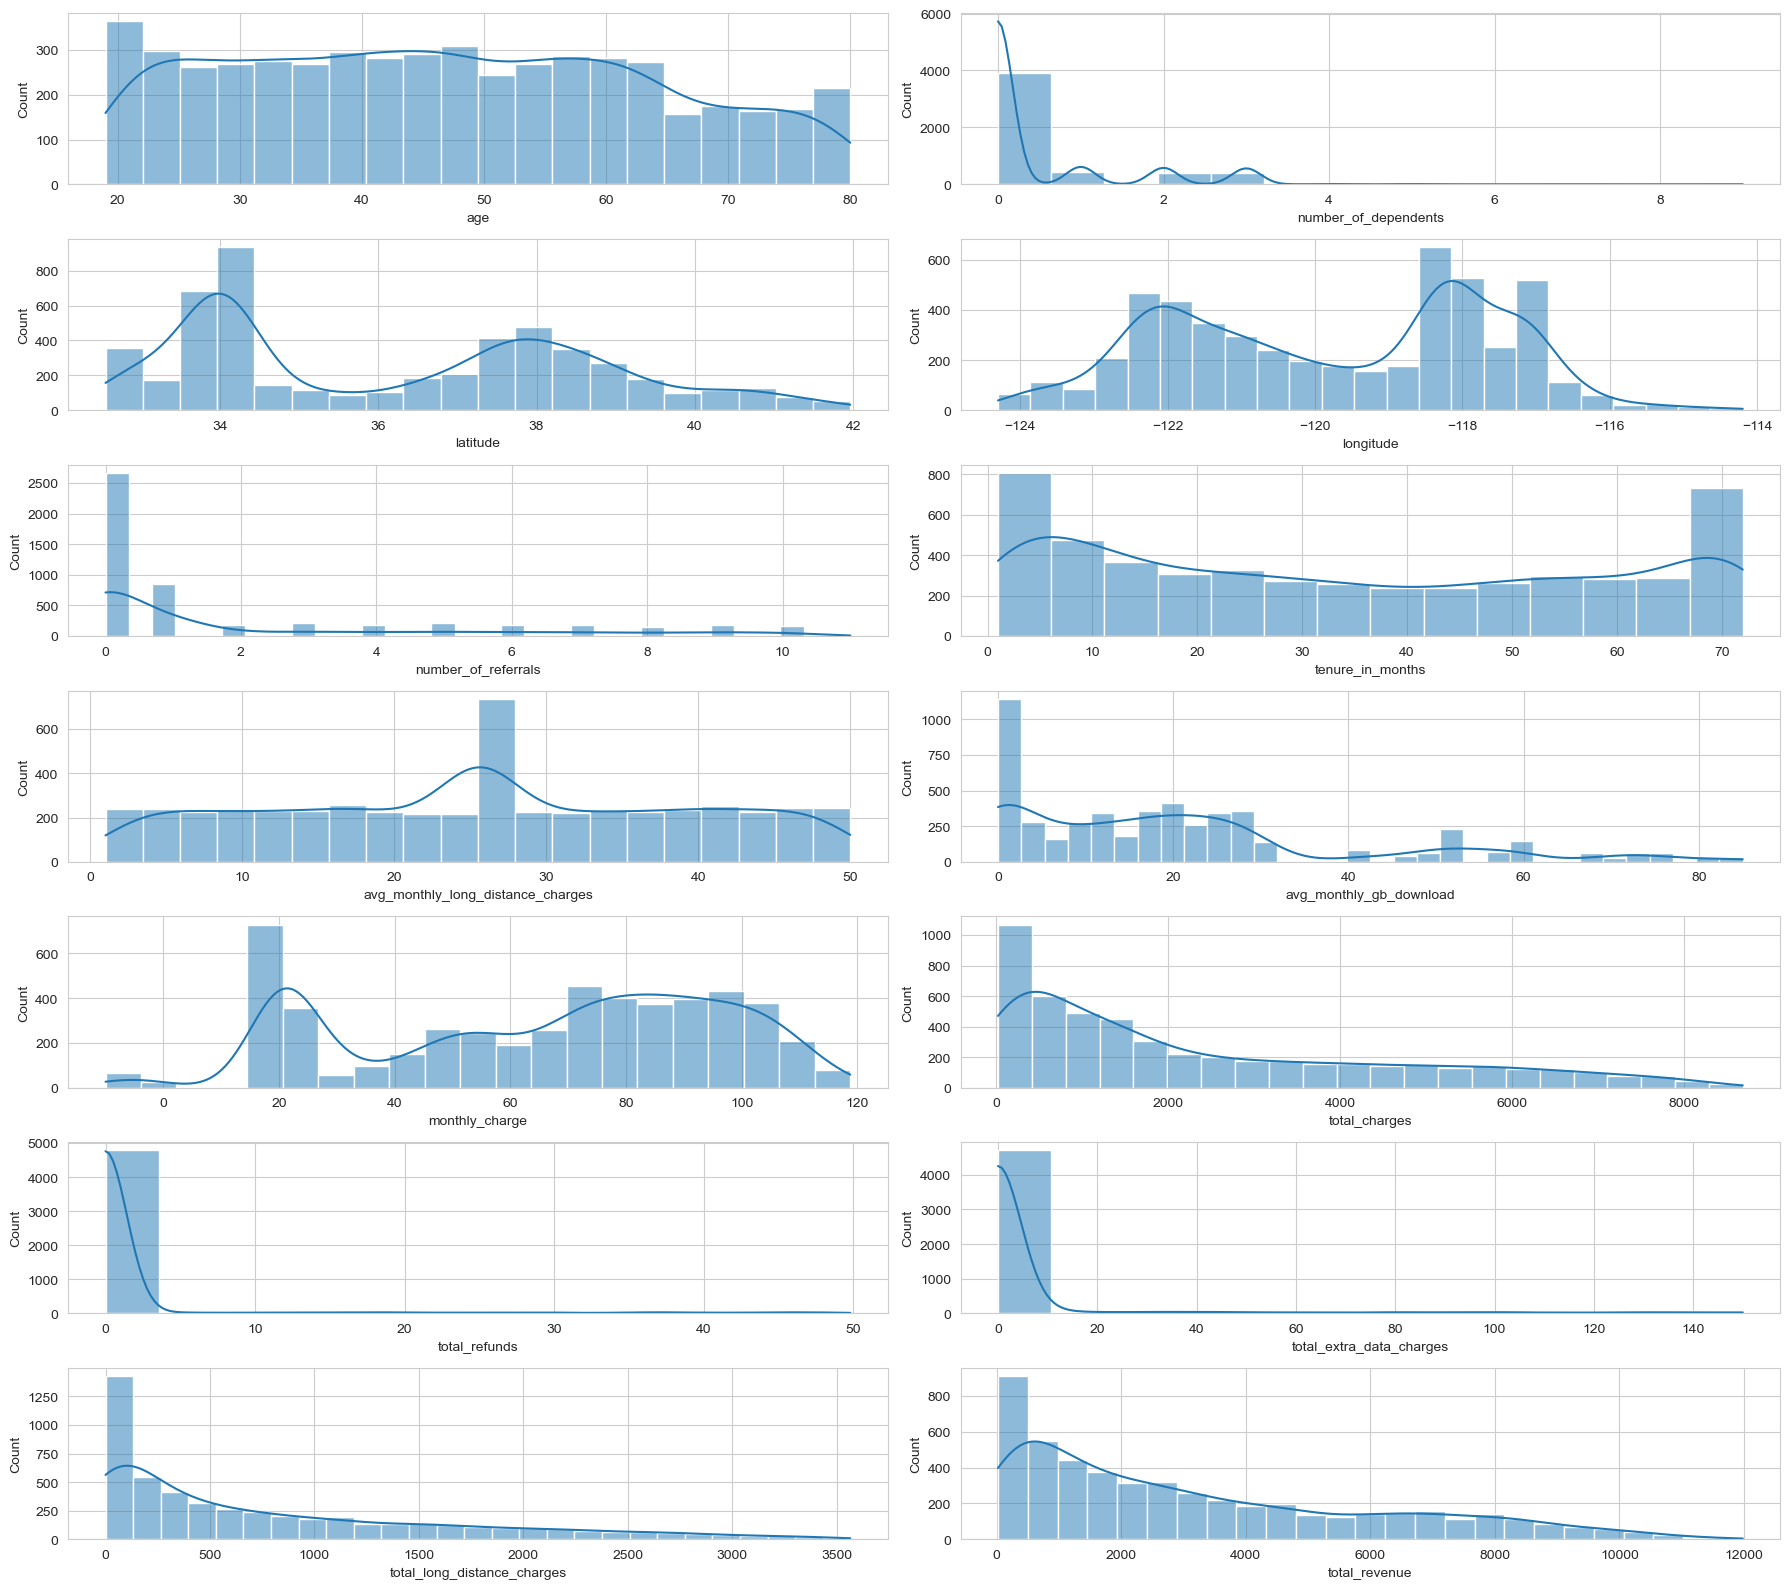

In [40]:
fig, axs = plt.subplots(7, 2, figsize=(18, 16))

for i, feat in enumerate(numeric_features):
    row, col = np.unravel_index(i, axs.shape)
    sns.histplot(data, x = feat, ax=axs[row, col], kde=True)

plt.tight_layout()
plt.show()

### total_refunds to categorical

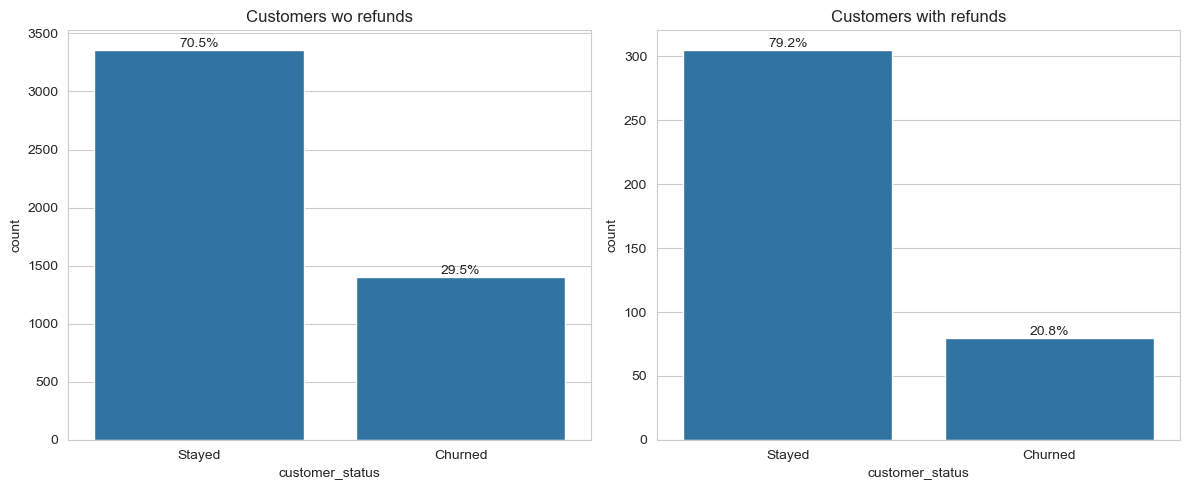

In [41]:
g, axes = plt.subplots(1, 2, figsize=(12, 5))

wo_refund = data[data['total_refunds'] == 0]['customer_status']
with_refund = data[data['total_refunds'] > 0]['customer_status']

sns.countplot(x=wo_refund, ax=axes[0])
axes[0].set_title('Customers wo refunds')

sns.countplot(x=with_refund, ax=axes[1])
axes[1].set_title('Customers with refunds')

def add_percentages(ax, total_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha="center", va="bottom", fontsize=10)

add_percentages(axes[0], wo_refund.count())
add_percentages(axes[1], with_refund.count())

plt.tight_layout()
plt.show()

<Axes: xlabel='total_refunds', ylabel='count'>

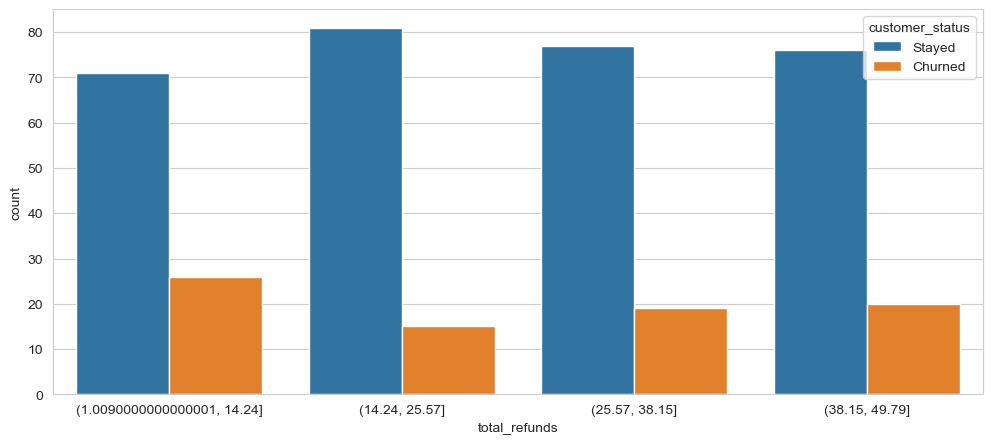

In [42]:
with_refund = data[data['total_refunds'] > 0.0]['total_refunds']
refund, bins = pd.qcut(with_refund, q=[0, 0.25, 0.5, 0.75, 1.0], retbins=True)
refund_y = data.loc[refund.index, 'customer_status']
plt.figure(figsize=(12, 5))
sns.countplot(x=refund, hue=refund_y)

It can be seen that the percentage of those with total_refund > 0 is more likely to stay. Moreover, there is almost no dependence on how much the client returned, which is shown by the division into quartiles.
When a numerical feature has a high proportion of zero values and relatively few unique non-zero values, such a feature may present certain difficulties for processing in modeling.

Let's transform the feature into binary:

total_refund = 0.0 -> 0

total_refund > 0.0 -> 1

In [43]:
def total_refund_transform(total_refund):
    if total_refund == 0.0:
        return 'No'
    else:
        return 'Yes'

In [44]:
data['total_refunds'] = data.apply({'total_refunds': total_refund_transform})
data.rename(columns={'total_refunds': 'has_refunded'}, inplace=True)

### total_extra_data_charges to categorical

<Axes: xlabel='total_extra_data_charges', ylabel='count'>

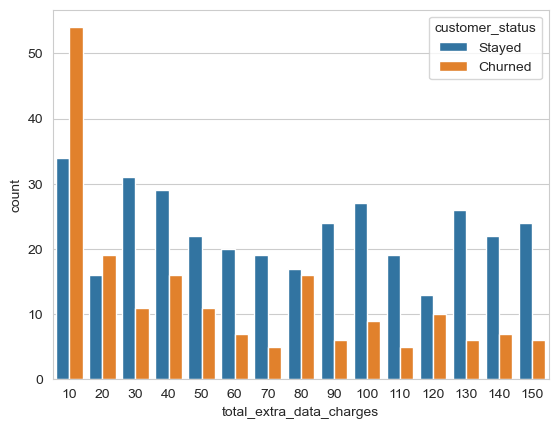

In [45]:
dd = data[data['total_extra_data_charges']>0]
sns.countplot(x=dd['total_extra_data_charges'], hue=dd['customer_status'])

Due to the small number of clients with non-zero additional costs, and normalization or standardization will not lead to a good result, it is easiest to transform this feature into a categorical one.

Binning is a poor fit for this function since we don't know the upper bound at least, and quartile partitioning is not appropriate since we have a large number of zero values compared to non-zero values.

The most suitable option is to transform it into a binary feature.

In [46]:
def total_extra_data_charges_transform(total_extra_data_charges):
    if total_extra_data_charges > 0:
        return 'Yes'
    else:
        return 'No'

In [47]:
data['total_extra_data_charges'] = data.apply({'total_extra_data_charges': total_extra_data_charges_transform})
data.rename(columns={'total_extra_data_charges': 'has_extra_data_charges'}, inplace=True)

### number_of_referrals to categorical

<Axes: xlabel='number_of_referrals', ylabel='count'>

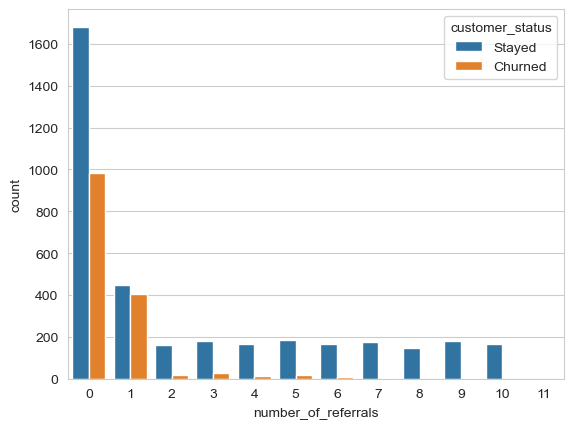

In [48]:
sns.countplot(x=data['number_of_referrals'], hue=data['customer_status'])

<Axes: xlabel='number_of_referrals', ylabel='count'>

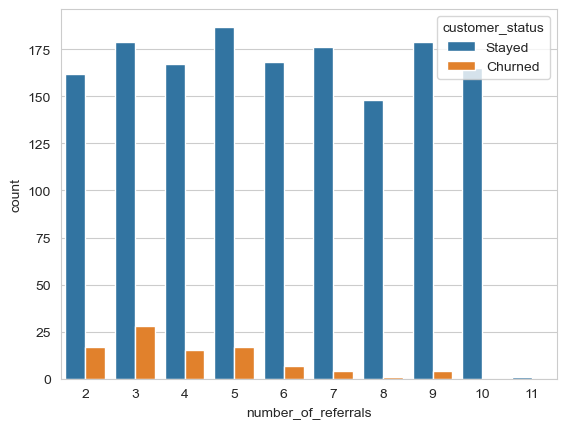

In [49]:
dd = data[data['number_of_referrals']>1]
sns.countplot(x=dd['number_of_referrals'], hue=dd['customer_status'])

It is clear that the more referrals, the less likely it is that customers will churn.

The biggest change occurs when there are more than 2 referrals, then most of the customers are suppressed.

In this case, three groups can be distinguished:
- 0 referrals
- 1 referral
- more than 1 referral

In [50]:
def number_of_referrals_transform(number_of_referrals):
    if number_of_referrals == 0:
        return '0'
    elif number_of_referrals == 1:
        return '1'
    else:
        return '2+'

<Axes: xlabel='number_of_referrals', ylabel='count'>

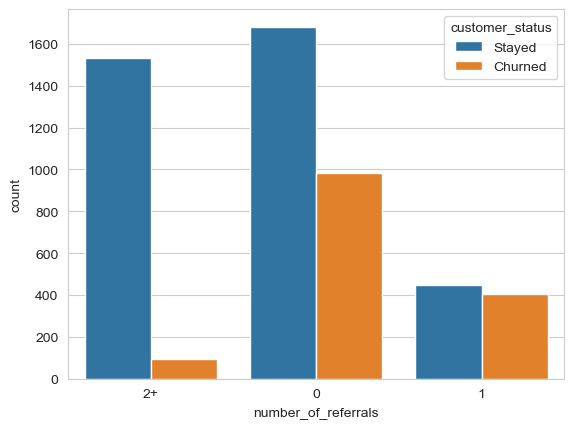

In [51]:
data['number_of_referrals'] = data.apply({'number_of_referrals': number_of_referrals_transform})
sns.countplot(x= data['number_of_referrals'], hue=data['customer_status'])

### number_of_dependents to categorical

<Axes: xlabel='number_of_dependents', ylabel='count'>

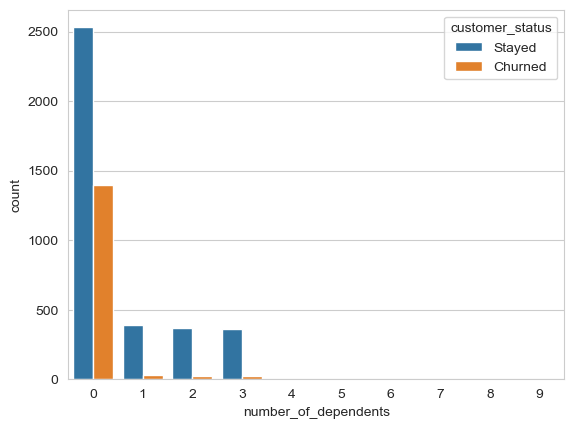

In [52]:
sns.countplot(x=data['number_of_dependents'], hue=data['customer_status'])

The reasoning is similar to the transformation of a feature number_of_referrals

In [53]:
def number_of_dependents_transform(number_of_dependents):
    if number_of_dependents == 0:
        return '0'
    else:
        return '1+'

In [54]:
data['number_of_dependents'] = data.apply({'number_of_dependents': number_of_dependents_transform})

### age to categorical

In [55]:
def age_transform(age):
    bins = [18, 25, 35, 45, 55, 65, 100]
    return pd.cut(age, bins=bins)

In [56]:
data['age'] = data.apply({'age': age_transform})

<Axes: xlabel='age', ylabel='count'>

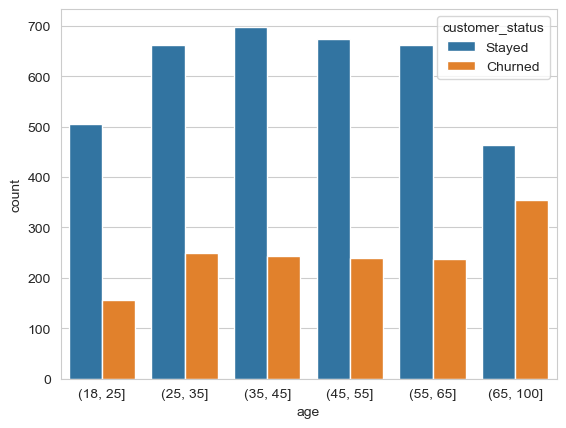

In [57]:
sns.countplot(x=data['age'], hue=data['customer_status'])